In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pprint
import random
%matplotlib inline

# Function with 2 variables

$y=3x^2 - 4x + 5$


In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

## Plot the Curve

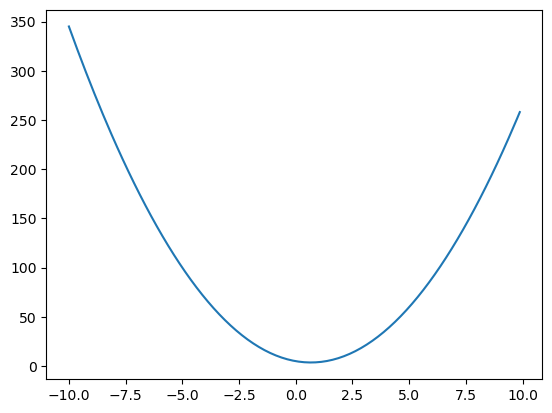

In [3]:
xs = np.arange(-10, 10, 0.125)
ys = f(xs)
plt.plot(xs, ys)

##  Calculate the slope at given x location

In [4]:
def getSlope(x):
    h = 0.000000001
    s = (f(x) - f(x - h)) / h
    return s

print(getSlope(-3.0))

-22.000001820288162


# Function with 3 variables 

In [5]:
d = lambda a, b, c: a * b +c

In [6]:
a = 2.0
b = -3.0
c = 10.0
d(a, b, c)

4.0

## Compute the diravative respect to $a$ at a point ($a,b,c$)

In [7]:
h = 0.00001
slope = (d(a+h, b, c) - d(a, b, c)) / h
print(d(a, b, c))
print(d(a+h, b, c))
print(slope)

4.0
3.9999699999999994
-3.000000000064062


##  Compute the derivative respect to $b$ at a point ($a, b, c$)

In [8]:
h = 0.00001
slope = (d(a, b+h, c) - d(a, b, c)) / h
print(d(a, b, c))
print(d(a, b+h, c))
print(slope)

4.0
4.00002
2.0000000000131024


##  Compute the derivative respect to $c$ at a point ($a, b, c$)

In [9]:
h = 0.00001
slope = (d(a, b, c+h) - d(a, b, c)) / h
print(d(a, b, c))
print(d(a, b, c+h))
print(slope)

4.0
4.00001
0.9999999999621422


# Create a Value Object

In [10]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # this is where numerical value get stored
        # this will contain the children nodes
        self._prev = set(_children)
        # Record the operation
        self._op = _op
        self.label = label
        self.grad = 0.0
    def __repr__(self):
        return "Value(data = {})".format(self.data)
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1)/(math.exp(2 * x) + 1)
        return Value(t, (self, ), 'tanh')

In [11]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b 
e.label='e'
d = e + c
d.label='d'
f = Value(-2.0, label='f')
L = d * f
L.label = 'L'



print(L)

Value(data = -8.0)


In [12]:
d._prev

{Value(data = -6.0), Value(data = 10.0)}

In [13]:
d._op

'+'

## Visualize computational graph 

In [14]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
    nodes, edges = trace(root)
    print(nodes)
    print(edges)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        # dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        
        dot.node(name = uid, label = "{ %s | data = %.4f | grad = %.4f}" % (n.label, n.data, n.grad), shape='record')
            
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

{Value(data = 4.0), Value(data = -2.0), Value(data = -6.0), Value(data = 10.0), Value(data = -3.0), Value(data = -8.0), Value(data = 2.0)}
{(Value(data = -2.0), Value(data = -8.0)), (Value(data = -3.0), Value(data = -6.0)), (Value(data = 2.0), Value(data = -6.0)), (Value(data = 4.0), Value(data = -8.0)), (Value(data = 10.0), Value(data = 4.0)), (Value(data = -6.0), Value(data = 4.0))}


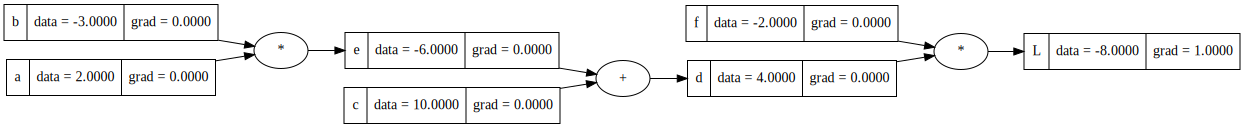

In [15]:
L.grad = 1.0
draw_dot(L)

# Compute the gradiants 

In [16]:
def getSlope(a, b, c, f, dval, h=0.00001):
    a = Value(a, label='a')
    b = Value(b, label='b')
    c = Value(c, label='c')
    f = Value(f, label='f')
    
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    L = d * f; L.label = 'L'
    
    L1 = L.data
    
    # Shift the value 
    if dval == 'a':
        a = Value(a.data + h, label='a')
    if dval == 'b':
        b = Value(b.data + h, label='b')
    if dval == 'c':
        c = Value(c.data + h, label='c')
    if dval == 'f':
        f = Value(f.data + h, label='f')
    
    e = a * b; e.label = 'e'
    if dval == 'e':
        e = Value(e.data + h, label='e')
        
    d = e + c; d.label = 'd'
    if dval == 'd':
        d = Value(d.data + h, label='d')

    L = d * f; L.label = 'L'
    if dval == 'L':
        L = Value(L.data + h, label='L')
    
    L2 = L.data
    
    s = (L2 - L1)/h
    
    return s

## Compute the gradiants at each node

{Value(data = 4.0), Value(data = -2.0), Value(data = -6.0), Value(data = 10.0), Value(data = -3.0), Value(data = -8.0), Value(data = 2.0)}
{(Value(data = -2.0), Value(data = -8.0)), (Value(data = -3.0), Value(data = -6.0)), (Value(data = 2.0), Value(data = -6.0)), (Value(data = 4.0), Value(data = -8.0)), (Value(data = 10.0), Value(data = 4.0)), (Value(data = -6.0), Value(data = 4.0))}


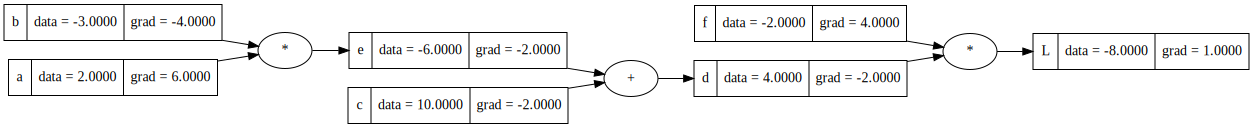

In [17]:
a_val = 2.0
b_val = -3.0
c_val = 10.0
f_val = -2.0
L.grad = getSlope(a_val, b_val, c_val, f_val, 'L')
f.grad = getSlope(a_val, b_val, c_val, f_val, 'f')
d.grad = getSlope(a_val, b_val, c_val, f_val, 'd')
c.grad = getSlope(a_val, b_val, c_val, f_val, 'c')
e.grad = getSlope(a_val, b_val, c_val, f_val, 'e')
b.grad = getSlope(a_val, b_val, c_val, f_val, 'b')
a.grad = getSlope(a_val, b_val, c_val, f_val, 'a')

draw_dot(L)

![Back-prop](nn1.jpg)

# Change all the inputs towards its gradiants by by small step size to get the L to increase by little amount 

## Chage the data by small step size

In [18]:
small_step_size = 0.001

a.data += a.grad * small_step_size
b.data += b.grad * small_step_size
c.data += c.grad * small_step_size
f.data += f.grad * small_step_size

## Apply the forward pass

{Value(data = 3.9719759999996382), Value(data = -7.928064095999174), Value(data = -1.9959999999999738), Value(data = -6.0260240000004375), Value(data = 9.998000000000076), Value(data = -3.004000000000026), Value(data = 2.006000000000128)}
{(Value(data = -1.9959999999999738), Value(data = -7.928064095999174)), (Value(data = 3.9719759999996382), Value(data = -7.928064095999174)), (Value(data = -3.004000000000026), Value(data = -6.0260240000004375)), (Value(data = 2.006000000000128), Value(data = -6.0260240000004375)), (Value(data = -6.0260240000004375), Value(data = 3.9719759999996382)), (Value(data = 9.998000000000076), Value(data = 3.9719759999996382))}


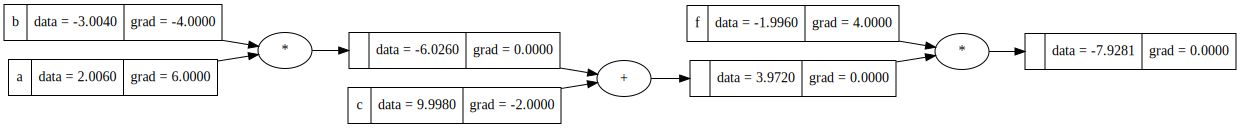

In [19]:
# forward pass
e = a * b
d = c + e
L = d * f
draw_dot(L)

# Coding a one Neuron 

![neuron](neuron.png)

## Plot Activation Function (tanh)

This Activation function map the input values to a value between -1 to 1

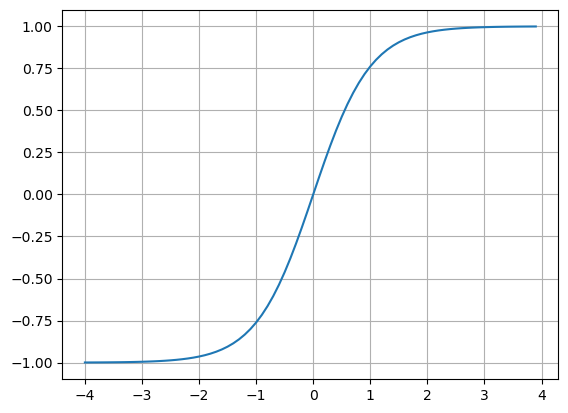

In [20]:
plt.plot(
    np.arange(-4, 4, 0.1),
    np.tanh(np.arange(-4, 4, 0.1))
)
plt.grid()

## Define the inputs

In [21]:
x1 = Value(2.0, label='X1')
x2 = Value(0.0, label='X2')

## Define weights

In [22]:
w1 = Value(-3.0, label='W1')
w2 = Value(1.0, label='W2')

## Define biase

In [23]:
# b = Value(8.0, label='b')

b = Value(6.8813735870195432, label='b')

## Compute the summation

$\sum_{i=1}^{n}{x_{i}w_{i}} + b$

{Value(data = 1.0), Value(data = 0.8813735870195432), Value(data = 6.881373587019543), Value(data = 2.0), Value(data = -6.0), Value(data = -6.0), Value(data = -3.0), Value(data = 0.0), Value(data = 0.0)}
{(Value(data = 6.881373587019543), Value(data = 0.8813735870195432)), (Value(data = -6.0), Value(data = 0.8813735870195432)), (Value(data = 2.0), Value(data = -6.0)), (Value(data = 0.0), Value(data = -6.0)), (Value(data = -3.0), Value(data = -6.0)), (Value(data = -6.0), Value(data = -6.0)), (Value(data = 0.0), Value(data = 0.0)), (Value(data = 1.0), Value(data = 0.0))}


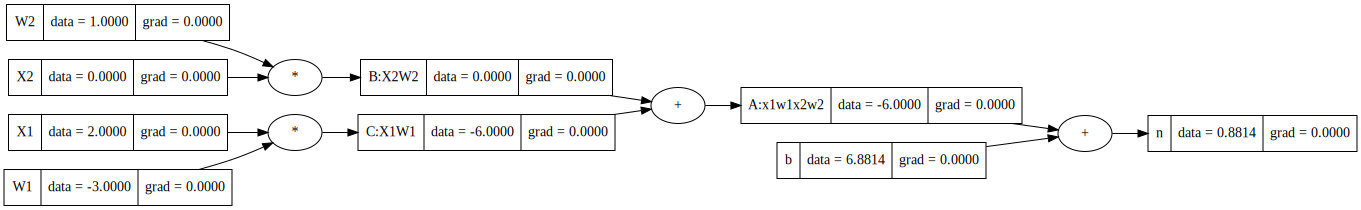

In [24]:
x1w1 = x1 * w1
x1w1.label = 'C:X1W1'

x2w2 = x2 * w2
x2w2.label = 'B:X2W2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'A:x1w1x2w2'

n = x1w1x2w2 + b
n.label = 'n'

# Implement the tanh function in the Value object
draw_dot(n)

## Apply the activation function 

{Value(data = 1.0), Value(data = 0.8813735870195432), Value(data = 6.881373587019543), Value(data = 2.0), Value(data = 0.7071067811865476), Value(data = -6.0), Value(data = -6.0), Value(data = -3.0), Value(data = 0.0), Value(data = 0.0)}
{(Value(data = 6.881373587019543), Value(data = 0.8813735870195432)), (Value(data = -6.0), Value(data = 0.8813735870195432)), (Value(data = 2.0), Value(data = -6.0)), (Value(data = 0.0), Value(data = -6.0)), (Value(data = -3.0), Value(data = -6.0)), (Value(data = 0.0), Value(data = 0.0)), (Value(data = 0.8813735870195432), Value(data = 0.7071067811865476)), (Value(data = -6.0), Value(data = -6.0)), (Value(data = 1.0), Value(data = 0.0))}


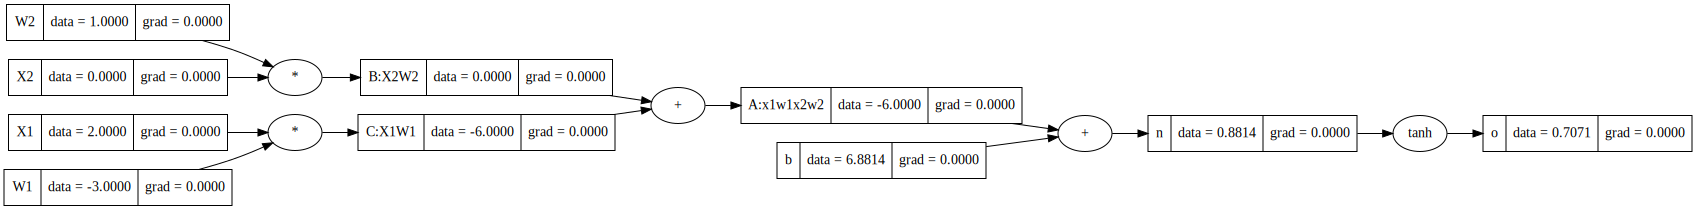

In [25]:
o = n.tanh()
o.label = 'o'
draw_dot(o)

## Analytical calculations of the gradiants of each step 

![backprop](backprop1.jpeg)

## Calulate all the gradiant values of each node

### Gradiant of the node-o $\big(\frac{\partial o}{\partial o} = 1\big)$

In [26]:
o.grad = 1

### Gradiant of the node-n $\big(\frac{\partial o}{\partial n} = 1 - tanh^2(n)\big)$

In [27]:
n.grad = 1 - np.tanh(n.data)**2
print(n.grad)

0.4999999999999999


### Gradiant of the node-b $\big(\frac{\partial o}{\partial A} = \frac{\partial o}{\partial n} = (1-\tanh^2(n)) \big)$

In [28]:
x1w1x2w2.grad = n.grad
print(x1w1x2w2.grad)

0.4999999999999999


### Gradiant of the node-A $\big(\frac{\partial o}{\partial b} = \frac{\partial o}{\partial n} = (1-\tanh^2(n)) \big)$

In [29]:
b.grad = n.grad
print(b.grad)

0.4999999999999999


### Gradiant of node-B $\big(\frac{\partial o}{\partial B} = \frac{\partial o}{\partial A}  =  \frac{\partial o}{\partial n} = (1-\tanh^2(n)) \big)$

In [30]:
x2w2.grad = x1w1x2w2.grad
print(x2w2.grad)

0.4999999999999999


### Gradiant of node-C $\big(\frac{\partial o}{\partial C} = \frac{\partial o}{\partial A}  =  \frac{\partial o}{\partial n} = (1-\tanh^2(n)) \big)$

In [31]:
x1w1.grad = x1w1x2w2.grad
print(x1w1.grad)

0.4999999999999999


### Gradiant of node-w2 $\big(\frac{\partial o}{\partial w2} = x2\frac{\partial o}{\partial B}  \big)$

In [32]:
w2.grad = x2.data * x2w2.grad
print(w2.grad)

0.0


### Graidant of node-w1 $\big(\frac{\partial o}{\partial w1} = x1\frac{\partial o}{\partial C}  \big)$

In [33]:
w1.grad = x1.data * x1w1.grad
print(w1.grad)

0.9999999999999998


### Gradiant of node-x1 $\big(\frac{\partial o}{\partial x1} = w1\frac{\partial o}{\partial C}  \big)$

In [34]:
x1.grad = w1.data * x1w1.grad
print(x1.grad)

-1.4999999999999996


### Gradiant of node-x2 $\big(\frac{\partial o}{\partial x2} = w2\frac{\partial o}{\partial B}  \big)$

In [35]:
x2.grad = w2.data * x2w2.grad
print(x2.grad)

0.4999999999999999


## All the gradiants are calculated using back-propogation

{Value(data = 1.0), Value(data = 0.8813735870195432), Value(data = 6.881373587019543), Value(data = 2.0), Value(data = 0.7071067811865476), Value(data = -6.0), Value(data = -6.0), Value(data = -3.0), Value(data = 0.0), Value(data = 0.0)}
{(Value(data = 6.881373587019543), Value(data = 0.8813735870195432)), (Value(data = -6.0), Value(data = 0.8813735870195432)), (Value(data = 2.0), Value(data = -6.0)), (Value(data = 0.0), Value(data = -6.0)), (Value(data = -3.0), Value(data = -6.0)), (Value(data = 0.0), Value(data = 0.0)), (Value(data = 0.8813735870195432), Value(data = 0.7071067811865476)), (Value(data = -6.0), Value(data = -6.0)), (Value(data = 1.0), Value(data = 0.0))}


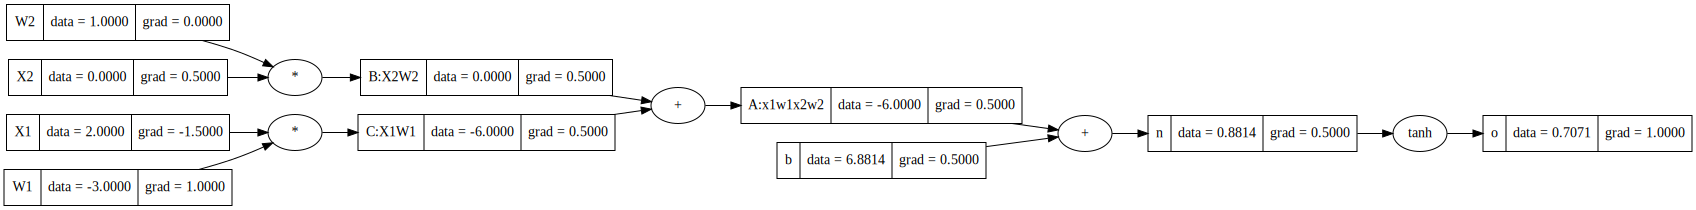

In [36]:
draw_dot(o)

# Implement the back propogation in the code 

In [37]:
class Value_v2:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # this is where numerical value get stored
        # this will contain the children nodes
        self._prev = set(_children)
        # Record the operation
        self._op = _op
        self.label = label
        self.grad = 0.0
        
        # this method perfom the backpropgation 
        self._backward = lambda: None # <-- By default there is no function implemented
        
    def __repr__(self):
        return "Value(data = {})".format(self.data)
    def __add__(self, other):
        out = Value_v2(self.data + other.data, (self, other), '+')
        
        #################################################################################################
        ########### Backprop method for the addition operation ##########################################
        #################################################################################################
        def _backward_add():
            # In the addition operation the gradiant from the output get distributed to self and other
            print('in the backward_add')
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad
            
        out._backward = _backward_add # <-- Define the backprop local method
        #################################################################################################
        
        return out
    
    def __mul__(self, other):
        out = Value_v2(self.data * other.data, (self, other), '*')
        
        #################################################################################################
        ########### Backprop method for the multiplication operation ####################################
        #################################################################################################
        def _backward_mul():
            self.grad = other.data * out.grad 
            other.grad = self.data * out.grad
        
        out._backward = _backward_mul # <-- Define the backprop in local method 
        #################################################################################################
        
        return out
    def tanh(self):
        x = self.data
        # this is tanh(x)
        t = (math.exp(2 * x) - 1)/(math.exp(2 * x) + 1)
        out = Value_v2(t, (self, ), 'tanh')
        
        #################################################################################################
        ########### Backprop method for the tanh operation ##############################################
        #################################################################################################
        def _backward_tanh():
            print('in the backward_tanh')
            self.grad = (1 - t**2) * out.grad
        
        out._backward = _backward_tanh # <-- Define the backprop in local method
        #################################################################################################
        
        return out
        

![Backprop](backprop_2.jpeg)

### Call the back propogation manually on each node

in the backward_tanh
in the backward_add
in the backward_add
{Value(data = 2.0), Value(data = -3.0), Value(data = 6.881373587019543), Value(data = 0.8813735870195432), Value(data = 0.0), Value(data = 0.7071067811865476), Value(data = -6.0), Value(data = 0.0), Value(data = -6.0), Value(data = 1.0)}
{(Value(data = 2.0), Value(data = -6.0)), (Value(data = 0.8813735870195432), Value(data = 0.7071067811865476)), (Value(data = 0.0), Value(data = 0.0)), (Value(data = 1.0), Value(data = 0.0)), (Value(data = -3.0), Value(data = -6.0)), (Value(data = -6.0), Value(data = -6.0)), (Value(data = 0.0), Value(data = -6.0)), (Value(data = -6.0), Value(data = 0.8813735870195432)), (Value(data = 6.881373587019543), Value(data = 0.8813735870195432))}


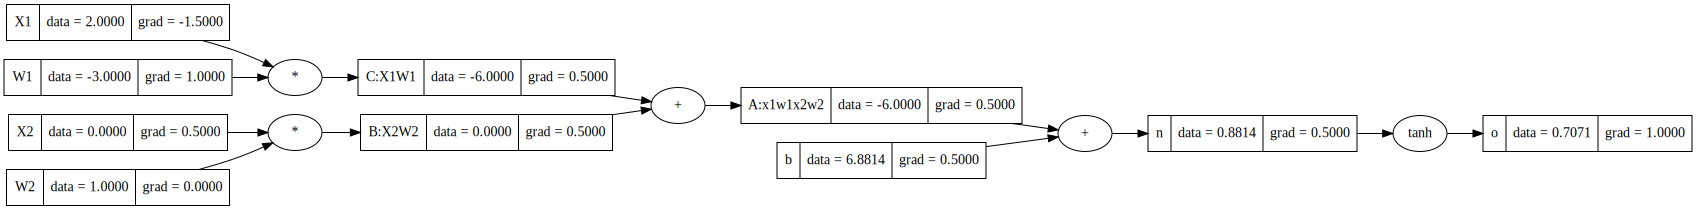

In [38]:
x1 = Value_v2(2.0, label='X1')
x2 = Value_v2(0.0, label='X2')
w1 = Value_v2(-3.0, label='W1')
w2 = Value_v2(1.0, label='W2')
b = Value_v2(6.8813735870195432, label='b')

C = x1 * w1
C.label = 'C:X1W1'

B = x2 * w2
B.label = 'B:X2W2'

A = C + B
A.label = 'A:x1w1x2w2'

n = A + b
n.label = 'n'
# Implement the tanh function in the Value object

o = n.tanh()
o.label = 'o'
o.grad = 1.0
o._backward()
n._backward()
b._backward()
A._backward()
B._backward()
C._backward()
w1._backward()
x1._backward()
w2._backward()
x2._backward()

draw_dot(o)

### Automate the back propogation across all the nodes

**The idea**: 
- We need to call the backward method on the last node of the graph which is the node-o (```o.backward()```)
- When (```o.backward()```) method execution completed, the connected (```n.backward()```) node backward method need to execute


**The method**:
- Step 1: Generate the topological sorted list of all the nodes (Learn more about topological graph: [Topological Sorting Video](https://www.youtube.com/watch?v=eL-KzMXSXXI))
  - Topological sort contain the dag with dependencies
- Step 2: Reverse the topological sort to get the last node to the beginning of the graph
- Step 3: Iteratively execute the ```backwared()``` method to execute the back propogation

#### This implements the topological sort for the graph 

In [39]:
topological_graph = []
visited_nodes = set()
def build_topological_graph(v):
    if v not in visited_nodes:
        visited_nodes.add(v)
        for child in v._prev:
            build_topological_graph(child)
        topological_graph.append(v)


build_topological_graph(o)
pprint.pprint(topological_graph)

[Value(data = 6.881373587019543),
 Value(data = 2.0),
 Value(data = -3.0),
 Value(data = -6.0),
 Value(data = 0.0),
 Value(data = 1.0),
 Value(data = 0.0),
 Value(data = -6.0),
 Value(data = 0.8813735870195432),
 Value(data = 0.7071067811865476)]


### Implement the backprop method in the class

In [40]:
class Value_v3:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # this is where numerical value get stored
        # this will contain the children nodes
        self._prev = set(_children)
        # Record the operation
        self._op = _op
        self.label = label
        self.grad = 0.0
        
        # this method perfom the backpropgation 
        self._backward = lambda: None # <-- By default there is no function implemented
        
    def __repr__(self):
        return "Value_v3(data = {})".format(self.data)
    def __add__(self, other):
        out = Value_v3(self.data + other.data, (self, other), '+')
        def _backward_add():
            # In the addition operation the gradiant from the output get distributed to self and other
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
            
        out._backward = _backward_add # <-- Define the backprop local method
        
        return out
    
    def __mul__(self, other):
        out = Value_v3(self.data * other.data, (self, other), '*')
        def _backward_mul():
            self.grad += other.data * out.grad 
            other.grad += self.data * out.grad
        
        out._backward = _backward_mul # <-- Define the backprop in local method 
        
        return out
    def tanh(self):
        x = self.data
        # this is tanh(x)
        t = (math.exp(2 * x) - 1)/(math.exp(2 * x) + 1)
        out = Value_v3(t, (self, ), 'tanh')
    
        def _backward_tanh():
            self.grad += (1 - t**2) * out.grad
        
        out._backward = _backward_tanh # <-- Define the backprop in local method
        
        return out
    
    def backpropogate(self):   
        topological_graph = []
        visited_nodes = set()
        
        # Generate the topological sorted list of all the nodes
        def build_topological_graph(v):
            if v not in visited_nodes:
                visited_nodes.add(v)
                for child in v._prev:
                    build_topological_graph(child)
                topological_graph.append(v)

        self.grad = 1.0
        build_topological_graph(self)
        
        # Reverse the topological order and execute the _backwared() method of each node in the reversed list
        for node in reversed(topological_graph):
            node._backward()

{Value_v3(data = -3.0), Value_v3(data = -6.0), Value_v3(data = 0.0), Value_v3(data = 0.8813735870195432), Value_v3(data = -6.0), Value_v3(data = 2.0), Value_v3(data = 6.881373587019543), Value_v3(data = 0.0), Value_v3(data = 1.0), Value_v3(data = 0.7071067811865476)}
{(Value_v3(data = 0.8813735870195432), Value_v3(data = 0.7071067811865476)), (Value_v3(data = 0.0), Value_v3(data = 0.0)), (Value_v3(data = 6.881373587019543), Value_v3(data = 0.8813735870195432)), (Value_v3(data = -3.0), Value_v3(data = -6.0)), (Value_v3(data = -6.0), Value_v3(data = -6.0)), (Value_v3(data = 1.0), Value_v3(data = 0.0)), (Value_v3(data = 0.0), Value_v3(data = -6.0)), (Value_v3(data = -6.0), Value_v3(data = 0.8813735870195432)), (Value_v3(data = 2.0), Value_v3(data = -6.0))}


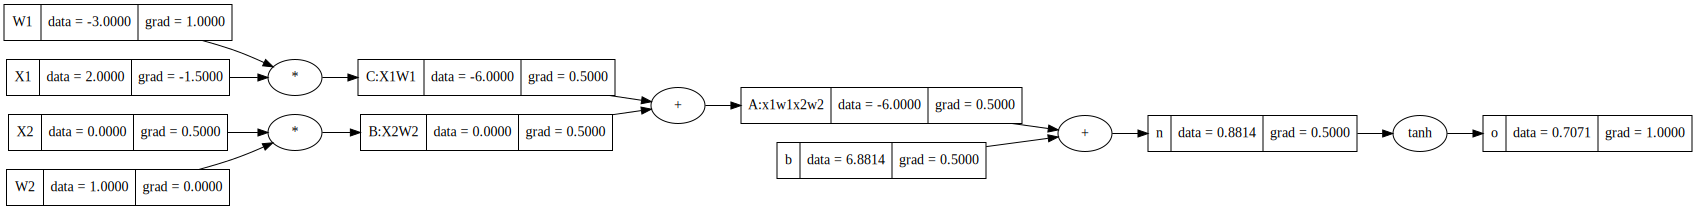

In [41]:
x1 = Value_v3(2.0, label='X1')
x2 = Value_v3(0.0, label='X2')
w1 = Value_v3(-3.0, label='W1')
w2 = Value_v3(1.0, label='W2')
b = Value_v3(6.8813735870195432, label='b')

C = x1 * w1
C.label = 'C:X1W1'
B = x2 * w2
B.label = 'B:X2W2'
A = C + B
A.label = 'A:x1w1x2w2'
n = A + b
n.label = 'n'
o = n.tanh()
o.label = 'o'

# Back propogate the entier graph
o.backpropogate()

draw_dot(o)

# Implement the tanh(x) using its exponential definition 

$tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$



## Add and multiply ```Value``` object and a number and vice versa

- As of Value_v3 object, the method $__mul__()$ does not know how to perform ($Value\_v3 \times number$) 
  - convert anything other than Value object to a Value object 
  - $__rmul__()$ let operate the reverse order
  
- As of Value_v3 object, the methog $__add__()$ does not know how to perform ($Value\_v3 + number$)
  - convert anything else to a Value object. 
  - $__radd__()$ let operate the reverse order

In [42]:
class Value_v4:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # this is where numerical value get stored
        # this will contain the children nodes
        self._prev = set(_children)
        # Record the operation
        self._op = _op
        self.label = label
        self.grad = 0.0
        
        # this method perfom the backpropgation 
        self._backward = lambda: None # <-- By default there is no function implemented
        
    def __repr__(self):
        return "Value_v4(data = {})".format(self.data)
    
    def __add__(self, other):
        if not isinstance(other, Value_v4):
            other = Value_v4(other)
        
        out = Value_v4(self.data + other.data, (self, other), '+')
        def _backward_add():
            # In the addition operation the gradiant from the output get distributed to self and other
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
            
        out._backward = _backward_add # <-- Define the backprop local method
        
        return out
    def __radd__(self, other):
        """ this method get call if __add__ method erroed out. 
        This method allow us to add number to valu object (ex: 1 + value(2.0) = value(3.0))
        """
        return self + other
    
    def __mul__(self, other):    
        # if te 'other' object is not a value_v4 object, then convert it first 
        if not isinstance(other, Value_v4):
            other = Value_v4(other)
        
        out = Value_v4(self.data * other.data, (self, other), '*')
        def _backward_mul():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        
        out._backward = _backward_mul # <-- Define the backprop in local method 
        return out
    
    def __rmul__(self, other):
        return self * other
    
    def tanh(self):
        x = self.data 
        # this is tanh(x)
        t = (math.exp(2 * x) - 1)/(math.exp(2 * x) + 1)
        out = Value_v4(t, (self, ), 'tanh')
    
        def _backward_tanh():
            self.grad += (1 - t**2) * out.grad
        
        out._backward = _backward_tanh # <-- Define the backprop in local method
        
        return out
    
    def backpropogate(self):   
        topological_graph = []
        visited_nodes = set()
        
        # Generate the topological sorted list of all the nodes
        def build_topological_graph(v):
            if v not in visited_nodes:
                visited_nodes.add(v)
                for child in v._prev:
                    build_topological_graph(child)
                topological_graph.append(v)

        self.grad = 1.0
        build_topological_graph(self)
        
        # Reverse the topological order and execute the _backwared() method of each node in the reversed list
        for node in reversed(topological_graph):
            node._backward()

In [43]:
a =  1 + Value_v4(2.0)
a

Value_v4(data = 3.0)

In [44]:
a = Value_v4(2.0) + 1
a

Value_v4(data = 3.0)

In [45]:
a * 3

Value_v4(data = 9.0)

In [46]:
3 * a

Value_v4(data = 9.0)

## Implement exponenet method

![backprop_exp](backprop_over_exp.jpeg)

In [47]:
class Value_v5:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # this is where numerical value get stored
        # this will contain the children nodes
        self._prev = set(_children)
        # Record the operation
        self._op = _op
        self.label = label
        self.grad = 0.0
        
        # this method perfom the backpropgation 
        self._backward = lambda: None # <-- By default there is no function implemented
        
    def __repr__(self):
        return "Value_v5(data = {})".format(self.data)
    
    def __add__(self, other):
        if not isinstance(other, Value_v5):
            other = Value_v5(other)
        
        out = Value_v5(self.data + other.data, (self, other), '+')
        def _backward_add():
            # In the addition operation the gradiant from the output get distributed to self and other
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
            
        out._backward = _backward_add # <-- Define the backprop local method
        
        return out
    def __radd__(self, other):
        """ this method get call if __add__ method erroed out. 
        This method allow us to add number to valu object (ex: 1 + value(2.0) = value(3.0))
        """
        return self + other
    
    def __mul__(self, other):    
        # if te 'other' object is not a Value_v5 object, then convert it first 
        if not isinstance(other, Value_v5):
            other = Value_v5(other)
        
        out = Value_v5(self.data * other.data, (self, other), '*')
        def _backward_mul():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        
        out._backward = _backward_mul # <-- Define the backprop in local method 
        return out
    
    def __rmul__(self, other):
        return self * other
    
    
    def exp(self):
        out =  Value_v5(math.exp(self.data), (self, ), 'exp')
        
        # need to add the _backprop method in exp
        def _backward_exp():
            self.grad = out.grad * math.exp(self.data)
        
        out._backward = _backward_exp
        
        return out
    
    def tanh(self):
        x = self.data
        # this is tanh(x)
        t = (math.exp(2 * x) - 1)/(math.exp(2 * x) + 1)
        out = Value_v5(t, (self, ), 'tanh')
    
        def _backward_tanh():
            self.grad += (1 - t**2) * out.grad
        
        out._backward = _backward_tanh # <-- Define the backprop in local method
        return out
    
    def backpropogate(self):   
        topological_graph = []
        visited_nodes = set()
        
        # Generate the topological sorted list of all the nodes
        def build_topological_graph(v):
            if v not in visited_nodes:
                visited_nodes.add(v)
                for child in v._prev:
                    build_topological_graph(child)
                topological_graph.append(v)

        self.grad = 1.0
        build_topological_graph(self)
        
        # Reverse the topological order and execute the _backwared() method of each node in the reversed list
        for node in reversed(topological_graph):
            node._backward()

In [48]:
a = Value_v5(2.0)
a

Value_v5(data = 2.0)

In [49]:
a.exp()

Value_v5(data = 7.38905609893065)

## Implement the division 

Division of a and b ($\frac{a}{b}$ ) can be think of as ($a \times b^{-1}$) 


![pow](pow.jpeg)

In [50]:
class Value_v6:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # this is where numerical value get stored
        # this will contain the children nodes
        self._prev = set(_children)
        # Record the operation
        self._op = _op
        self.label = label
        self.grad = 0.0
        # this method perfom the backpropgation 
        self._backward = lambda: None # <-- By default there is no function implemented
        
    def __repr__(self):
        
        # return ''
        return "Value_v6(data = {})".format(self.data)
    
    def __add__(self, other):
        if not isinstance(other, Value_v6):
            other = Value_v6(other)
        out = Value_v6(self.data + other.data, (self, other), '+')
        def _backward_add():
            # In the addition operation the gradiant from the output get distributed to self and other
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
        out._backward = _backward_add # <-- Define the backprop local method
        return out
    
    def __sub__(self, other):
        if not isinstance(other, Value_v6):
            other = Value_v6(other)
        out = self + (-1 * other)    
        return out
    
    def __rsub__(self, other):
        return -1 * (self - other)
    
    def __radd__(self, other):
        """ this method get call if __add__ method erroed out. 
        This method allow us to add number to valu object (ex: 1 + value(2.0) = value(3.0))
        """
        return self + other
    
    def __mul__(self, other):    
        # if te 'other' object is not a Value_v6 object, then convert it first 
        if not isinstance(other, Value_v6):
            other = Value_v6(other)
        
        out = Value_v6(self.data * other.data, (self, other), '*')
        def _backward_mul():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        
        out._backward = _backward_mul # <-- Define the backprop in local method 
        return out
    
    def __rmul__(self, other):
        return self * other
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "Only supporting int/float powers for now"
        x = self.data 
        x = x**other
        out = Value_v6(x, (self, ), f'**{other}')
        
        def _backward_pow():
            self.grad += other * (self.data ** (other-1)) * out.grad
        
        out._backward = _backward_pow
        
        return out
    
    def __truediv__(self, other):
        """ Implement the divistion """
        return self * other**-1 # <- this call the __pow__ method 
    
    
    def exp(self):
        out =  Value_v6(math.exp(self.data), (self, ), 'exp')
        # need to add the _backprop method in exp
        def _backward_exp():
            self.grad = out.grad * math.exp(self.data)
        
        out._backward = _backward_exp
        return out
    
    def tanh(self):
        x = self.data
        # this is tanh(x)
        t = (math.exp(2 * x) - 1)/(math.exp(2 * x) + 1)
        out = Value_v6(t, (self, ), 'tanh')
    
        def _backward_tanh():
            self.grad += (1 - t**2) * out.grad
        
        out._backward = _backward_tanh # <-- Define the backprop in local method
        return out
    
    def backpropogate(self):   
        topological_graph = []
        visited_nodes = set()
        
        # Generate the topological sorted list of all the nodes
        def build_topological_graph(v):
            if v not in visited_nodes:
                visited_nodes.add(v)
                for child in v._prev:
                    build_topological_graph(child)
                topological_graph.append(v)

        self.grad = 1.0
        build_topological_graph(self)
        
        # Reverse the topological order and execute the _backwared() method of each node in the reversed list
        for node in reversed(topological_graph):
            node._backward()

In [51]:
a = Value_v6(20)
b = Value_v6(2)
100 - a

Value_v6(data = 80)

## Implement the tanh by exponenets 

{Value_v6(data = 0.7071067811865476), Value_v6(data = 0.0), Value_v6(data = 1.0), Value_v6(data = 0.8813735870195432), Value_v6(data = 6.881373587019543), Value_v6(data = -3.0), Value_v6(data = 0.0), Value_v6(data = 2.0), Value_v6(data = -6.0), Value_v6(data = -6.0)}
{(Value_v6(data = -6.0), Value_v6(data = -6.0)), (Value_v6(data = -6.0), Value_v6(data = 0.8813735870195432)), (Value_v6(data = 6.881373587019543), Value_v6(data = 0.8813735870195432)), (Value_v6(data = 0.0), Value_v6(data = -6.0)), (Value_v6(data = 2.0), Value_v6(data = -6.0)), (Value_v6(data = -3.0), Value_v6(data = -6.0)), (Value_v6(data = 0.0), Value_v6(data = 0.0)), (Value_v6(data = 0.8813735870195432), Value_v6(data = 0.7071067811865476)), (Value_v6(data = 1.0), Value_v6(data = 0.0))}


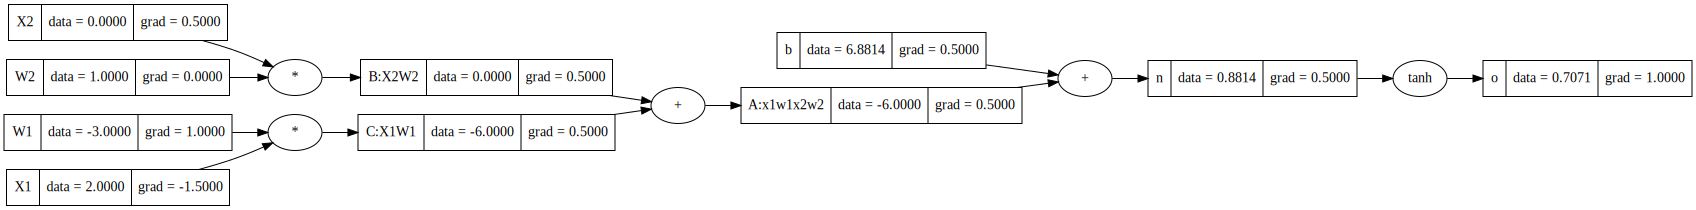

In [52]:
x1 = Value_v6(2.0, label='X1')
x2 = Value_v6(0.0, label='X2')
w1 = Value_v6(-3.0, label='W1')
w2 = Value_v6(1.0, label='W2')
b = Value_v6(6.8813735870195432, label='b')

C = x1 * w1
C.label = 'C:X1W1'
B = x2 * w2
B.label = 'B:X2W2'
A = C + B
A.label = 'A:x1w1x2w2'
n = A + b
n.label = 'n'
o = n.tanh()
o.label = 'o'

# Back propogate the entier graph
o.backpropogate()

draw_dot(o)

{Value_v6(data = -1), Value_v6(data = -6.0), Value_v6(data = 0.1464466094067262), Value_v6(data = 6.881373587019543), Value_v6(data = 1), Value_v6(data = -1), Value_v6(data = 1), Value_v6(data = 5.828427124746192), Value_v6(data = 0.7071067811865477), Value_v6(data = 0.0), Value_v6(data = 0.0), Value_v6(data = 6.828427124746192), Value_v6(data = 1.7627471740390863), Value_v6(data = 2.0), Value_v6(data = 2), Value_v6(data = 0.8813735870195432), Value_v6(data = -6.0), Value_v6(data = 1.0), Value_v6(data = -3.0), Value_v6(data = 4.828427124746192)}
{(Value_v6(data = -1), Value_v6(data = -1)), (Value_v6(data = -3.0), Value_v6(data = -6.0)), (Value_v6(data = 1.0), Value_v6(data = 0.0)), (Value_v6(data = 0.1464466094067262), Value_v6(data = 0.7071067811865477)), (Value_v6(data = 0.8813735870195432), Value_v6(data = 1.7627471740390863)), (Value_v6(data = 1), Value_v6(data = -1)), (Value_v6(data = -6.0), Value_v6(data = 0.8813735870195432)), (Value_v6(data = 0.0), Value_v6(data = 0.0)), (Value

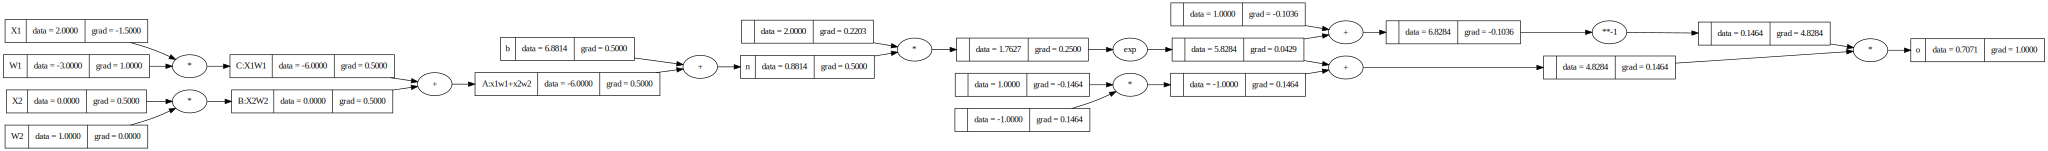

In [53]:
x1 = Value_v6(2.0, label='X1')
x2 = Value_v6(0.0, label='X2')
w1 = Value_v6(-3.0, label='W1')
w2 = Value_v6(1.0, label='W2')
b = Value_v6(6.8813735870195432, label='b')

C = x1 * w1
C.label = 'C:X1W1'
B = x2 * w2
B.label = 'B:X2W2'
A = C + B
A.label = 'A:x1w1+x2w2'
n = A + b
n.label = 'n'


########################################
# tanh(x) =  (e^(2x)-1) / (e^(2x) + 1)
# tanh(x) replace by exponenet equation
e = (2*n).exp()
o = (e-1)/(e+1)
o.label = 'o'
#######################################
o.backpropogate()

draw_dot(o)

# Implement the same NN using torch

In [54]:
import torch

In [55]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print('----')
print('x1 = {} | grad ', x1.data.item())
print('x2', x2.data.item())
print('w1', w1.data.item())
print('w2', w2.data.item())
print('b', b.data.item())
print('n', n.data.item())
print('o', o.data.item())

o.backward()

----
x1 = {} | grad  2.0
x2 0.0
w1 -3.0
w2 1.0
b 6.881373405456543
n 0.881373405456543
o 0.7071066904050358


# Build a single $Neuron$ using micrograd code

![neuralmodel](neuron_model.jpeg)

In [56]:
class Neuron:
    def __init__(self, nin: int):
        """
        params:
            nin - number of inputs
        """
        
        self.data = 0.0
        # Initialize random weights. 
        # Number of weights need to be equals to number of inputs 
        self.w = []
        for i in range(nin):
            self.w += [Value_v6(random.uniform(-1, 1), label="w{}".format(i))]
        
        # Initalize a biase 
        self.b = Value_v6(random.uniform(-1, 1), label="b")
        
    def __call__(self, x: list):
        """ We want to call this method and compute the x*w + b """

        # this is the forward pass
        psum = 0.0
        for x, w in zip(x, self.w):
            psum += x * w
        
        # add the biase term
        out = psum + self.b
        
        # send through the activation function
        out.tanh()
        
        return out
    
    def parameters(self):
        
        params = self.w + [self.b]
        
        return params
        
        

{Value_v6(data = -4.725676764749693), Value_v6(data = 0.0), Value_v6(data = 3.0), Value_v6(data = -2.51429757704019), Value_v6(data = -0.931297495465754), Value_v6(data = -1.280081692243749), Value_v6(data = 2.0), Value_v6(data = -3.794379269283939), Value_v6(data = -0.6400408461218745), Value_v6(data = -1.280081692243749), Value_v6(data = -0.83809919234673)}
{(Value_v6(data = -0.931297495465754), Value_v6(data = -4.725676764749693)), (Value_v6(data = -0.6400408461218745), Value_v6(data = -1.280081692243749)), (Value_v6(data = 2.0), Value_v6(data = -1.280081692243749)), (Value_v6(data = -1.280081692243749), Value_v6(data = -1.280081692243749)), (Value_v6(data = -1.280081692243749), Value_v6(data = -3.794379269283939)), (Value_v6(data = 0.0), Value_v6(data = -1.280081692243749)), (Value_v6(data = -2.51429757704019), Value_v6(data = -3.794379269283939)), (Value_v6(data = -3.794379269283939), Value_v6(data = -4.725676764749693)), (Value_v6(data = -0.83809919234673), Value_v6(data = -2.514

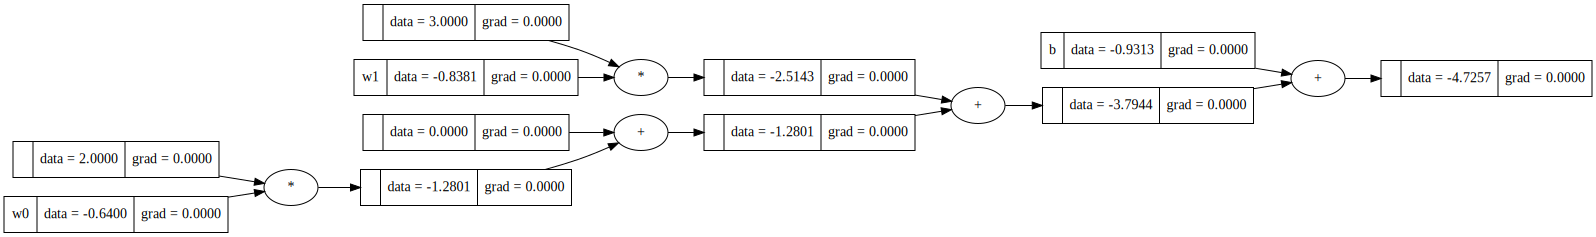

In [57]:
# two inputs     
x = [2.0, 3.0]
# Create neuron object that has the initialized weights and biase terms
n = Neuron(len(x))
# input the x values and calculate the output of the neuron 
o = n(x) # <-- this call the __call__() method in the 
draw_dot(o)

In [58]:
n.parameters()


[Value_v6(data = -0.6400408461218745),
 Value_v6(data = -0.83809919234673),
 Value_v6(data = -0.931297495465754)]

## Build the Layers of Neurons

![NN2](neural_net2.jpeg)

In [59]:
class Layer:
    """ Create a layer of neurons
    """
    def __init__(self, nin: int, nn: int):
        """ Initialize the neurons
        params:
            nn - Number of neurons in the layer
            nin - Number of inputs a neuron will take
        """
        self.neurons = []
        for i in range(nn):
            self.neurons += [Neuron(nin)]
        
    def __call__(self, x: list):
        """ calculate the layer 
        
        params:
            x - list of inputs
        """
        
        out = []
        for n in self.neurons:
            out += [n(x)]

        return out
        
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
        
# number of inputs
x = [2.0, 3.0, 5.0]

# Layer 1 has 4 neurons
l1 = Layer(len(x), 4)

# apply the forward pass 
out = l1(x)

pprint.pprint(out)
# draw_dot(out[0])


[Value_v6(data = -5.5110745917444435),
 Value_v6(data = -0.9695681536724223),
 Value_v6(data = 7.963017384116813),
 Value_v6(data = -1.8641730074788903)]


## Generate a Multilayer Perceptron

{Value_v6(data = 0.2408015434030646), Value_v6(data = 0.94163301065775), Value_v6(data = -0.2183699430035424), Value_v6(data = 0.6568883556186589), Value_v6(data = -2.808169487698257), Value_v6(data = 5.571017226272819), Value_v6(data = 0.0), Value_v6(data = -2.808169487698257), Value_v6(data = 0.0), Value_v6(data = 5.571017226272819), Value_v6(data = -3.3790149509697875), Value_v6(data = 1.7748012199785357), Value_v6(data = -6.187184438668044), Value_v6(data = 7.3458184462513545), Value_v6(data = -0.19561789170903804), Value_v6(data = 0.8950456255163766), Value_v6(data = -6.382802330377082), Value_v6(data = 8.240864071767732), Value_v6(data = -1.3675767750008112), Value_v6(data = 2.5466258023502824), Value_v6(data = -7.750379105377894), Value_v6(data = -8.052931549296954), Value_v6(data = 10.787489874118014), Value_v6(data = 10.080002790894358), Value_v6(data = 0.36178680372344785), Value_v6(data = -1.1243318204682002), Value_v6(data = 0.0), Value_v6(data = 0.36178680372344785), Value

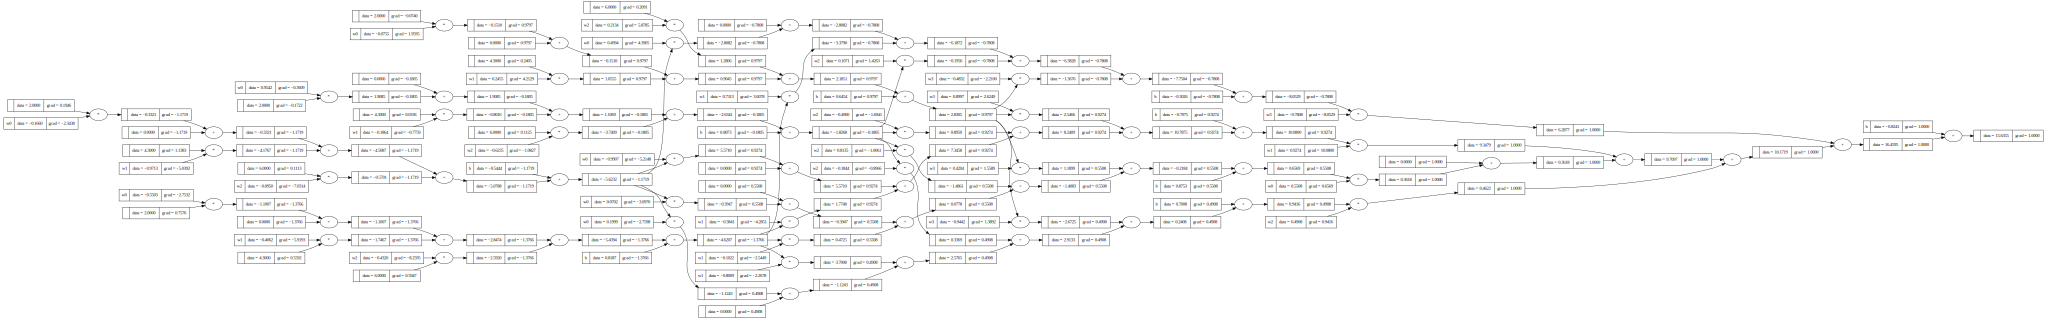

In [60]:
class MLP:
    def __init__(self, initial_input_len: int, layers: []):
        
        
        nn = [initial_input_len] + layers
        # [3, 4, 4, 1]
        
        self.layers = []
        for i in range(len(layers)):
            self.layers += [Layer(nn[i], nn[i+1])]
            # i = 0, Layer(3, 4)
            # i = 1, Layer(4, 4)
            # i = 2, Layer(4, 1)
            
    def __call__(self, x:[]):
        
        for l in self.layers:
            x = l(x)
        return x[0]
    
    def parameters(self):
    
        params = [p for l in self.layers for p in l.parameters()]
        
        return params
        
        
        
    
    
x = [2.0, 4.3, 6.0]
l = [4, 4, 1]
mlp1 = MLP(len(x), l)
y = mlp1(x)
y.backpropogate()
draw_dot(y)

In [61]:
mlp1.parameters()

[Value_v6(data = -0.1660327713355314),
 Value_v6(data = -0.9713194573932411),
 Value_v6(data = -0.0950109045708849),
 Value_v6(data = -0.5443520443861445),
 Value_v6(data = -0.5503433983535799),
 Value_v6(data = -0.40620461615534653),
 Value_v6(data = -0.432005148708936),
 Value_v6(data = 0.8186986392227593),
 Value_v6(data = 0.9542360528338882),
 Value_v6(data = -0.18642290983380727),
 Value_v6(data = -0.6234872985204849),
 Value_v6(data = 0.8073024642626274),
 Value_v6(data = -0.07550913535098935),
 Value_v6(data = 0.24547498057510464),
 Value_v6(data = 0.21342868840344975),
 Value_v6(data = 0.6453998541930113),
 Value_v6(data = 0.0701874130182163),
 Value_v6(data = -0.10224943160731481),
 Value_v6(data = 0.8135108410737484),
 Value_v6(data = 0.42039852445409776),
 Value_v6(data = 0.8752582986222013),
 Value_v6(data = -0.9907277250206681),
 Value_v6(data = -0.38409800307124686),
 Value_v6(data = -0.4899613722716414),
 Value_v6(data = 0.8997100455333182),
 Value_v6(data = -0.707487083

mlp1.parameters()# Example 

- In the example we have three cases, for each case is a list of 3 inputs ($x_1$, $x_2$, $x_3$)
- Each case will go through a MLP with 3 layers 
  - **Layer_1** has 4 neurons and each will take 3 inputs ($x_1$, $x_2$, $x_3$)
  - **Layer_2** has 4 neurons and each will take 4 inpurs (from one input from each neuron from **Layer_1**)
  - **Layer_3** has 1 neuron that that will take 4 inputs (from one input from each neuron from **Layer_2**)
- Each case has expected outcomes

In [62]:
# These are the inputs 
x1 = [
        [2.0, 3.0, -1.0], # case 1
        [3.0, -1.0, 0.5], # case 2
        [0.5, 1.0, 1.0],  # case 3
        [1.0, 1.0, -1.0]  # case 4
     ]

# this is what we want as the output
y1 = [
        1.0,  # case 1 should output this 
        -1.0, # case 2 should output this 
        -1.0, # case 3 should output this 
        1.0   # case 4 should output this 
     ]
l = [4, 4, 1]
mlp1 = MLP(3, l)

## Forward pass 

- Compute the outcome for each case ($out1$, $out2$, $out3$, $out4$)

In [63]:
yout = [mlp1(x) for x in x1]
for i in range(len(yout)):
    print("Out_{} = {}".format(i, yout[i]))

Out_0 = Value_v6(data = -1.3192630117590183)
Out_1 = Value_v6(data = 1.8186078043239962)
Out_2 = Value_v6(data = -0.3957363181918396)
Out_3 = Value_v6(data = -0.6932315101703552)


## Compute the loss value

- The different between the expeted outcome and actual outcome is the error. 
- Create a one number by squaring the error to get rid of the sign and add all them together (all the error from case_1 to case_4) to get a one number (loss)


In [64]:
loss = []
loss += [sum([(i - j)**2 for i, j in zip(yout, y1)])]

print('Total Loss = {}'.format(loss))

Total Loss = [Value_v6(data = 16.555698416495783)]


## Back propogate

- Compute all the gradiants using back propogation method 

****************************************************************************************************
Value_v6(data = 16.555698416495783)
****************************************************************************************************
{Value_v6(data = -0.60092121499705), Value_v6(data = -1.0), Value_v6(data = -0.10428743236546945), Value_v6(data = -0.17511266978651596), Value_v6(data = -2.0303390951353713), Value_v6(data = 1.0), Value_v6(data = 0.0), Value_v6(data = 0.2254316072830267), Value_v6(data = 0.3013340464000587), Value_v6(data = 0.8702679939837362), Value_v6(data = 2.0), Value_v6(data = -0.6017566326703352), Value_v6(data = -0.2303613085355466), Value_v6(data = 1.0), Value_v6(data = -0.8668563392454764), Value_v6(data = -1.160071101151635), Value_v6(data = 0.0), Value_v6(data = 1.0), Value_v6(data = -0.6017566326703352), Value_v6(data = -0.6077458638707376), Value_v6(data = -0.5655222928454178), Value_v6(data = -0.2052499526769061), Value_v6(data = -0.034758908458102096), 

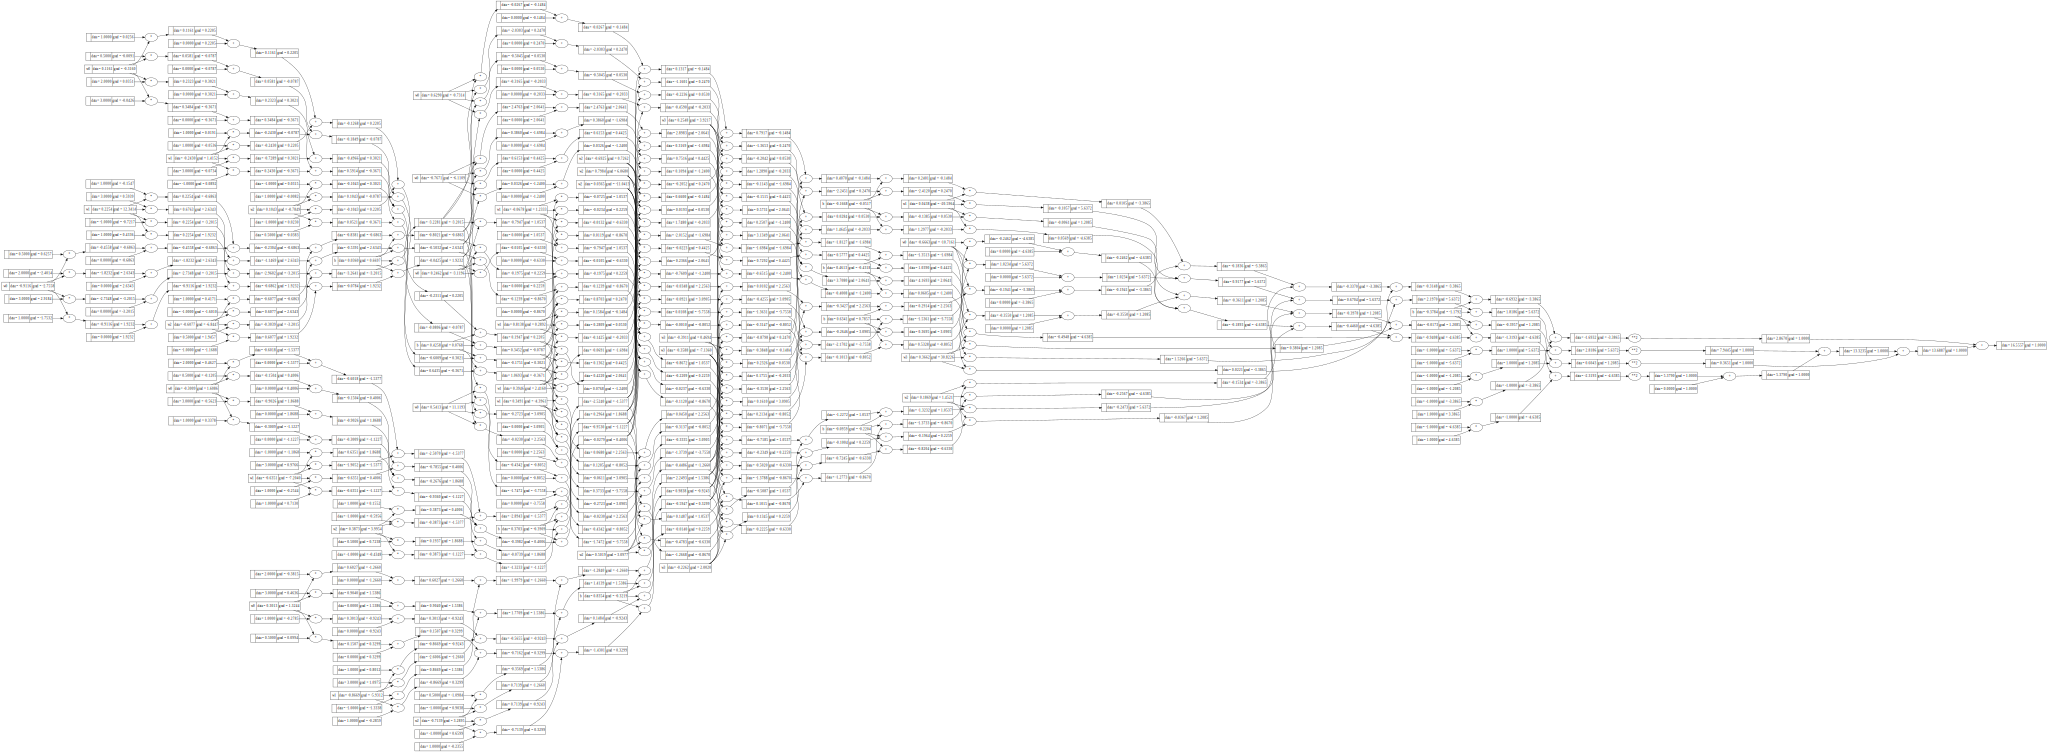

In [65]:
loss[0].backpropogate()
print('*'*100)
print(loss[0])
print('*'*100)
draw_dot(loss[0])

# Goal is to reduce the loss

## Collect all the trainable parameters from the network 

In [66]:
mlp1_params = mlp1.parameters()
print("This MLP has {} number of parameters".format(len(mlp1_params)))

This MLP has 41 number of parameters


In [67]:
mlp1_params

[Value_v6(data = -0.9115858316371466),
 Value_v6(data = 0.2254316072830267),
 Value_v6(data = -0.6077458638707376),
 Value_v6(data = 0.03595803175452872),
 Value_v6(data = 0.11613684773948596),
 Value_v6(data = -0.24296915937018415),
 Value_v6(data = 0.10428743236546945),
 Value_v6(data = 0.425808545210534),
 Value_v6(data = -0.3008783163351676),
 Value_v6(data = -0.6350804096845379),
 Value_v6(data = 0.38731244392390796),
 Value_v6(data = 0.37026776894621394),
 Value_v6(data = 0.3013340464000587),
 Value_v6(data = -0.8668563392454764),
 Value_v6(data = -0.7138970238955724),
 Value_v6(data = 0.8353820488335646),
 Value_v6(data = 0.5412605500225594),
 Value_v6(data = 0.3491117025876469),
 Value_v6(data = 0.036473016173629524),
 Value_v6(data = -0.358809526266912),
 Value_v6(data = 0.6341115200021266),
 Value_v6(data = 0.6289571505879008),
 Value_v6(data = 0.813842682438003),
 Value_v6(data = -0.6925476009004721),
 Value_v6(data = -0.3911408006085557),
 Value_v6(data = -0.166848042439847

## Each parameter now has a gradiant 

- Gradiant tell us what direction and what magnitude the parameter value need to change the maximize the output of the network (this is the definition of the gradiant)
- But, what we need is to reduce the loss. This mean we have to go on the opposite direction of the gradiant (this is to minimize the output)
- We can simply multiply by minus sign ($-$) and nudge the parameter value on that direction and recompute the loss and see how far it got reduced  


In [68]:
# Take a look at a one parameter
print("Parameter label = {}".format(mlp1_params[2].label))
print("Parameter data = {}".format(mlp1_params[2].data))
print("Parameter gradiant = {}".format(mlp1_params[2].grad))

Parameter label = w2
Parameter data = -0.6077458638707376
Parameter gradiant = -6.844671117146309


## Update the parameter value to minimize the data

- Each iteration the loss value now get smaller -> our predictions getting closer to the actual (expected) values

In [69]:
for p in mlp1_params:
    p.data += - p.grad * 0.001

In [70]:
print("Parameter label = {}".format(mlp1_params[2].label))
print("Parameter data = {}".format(mlp1_params[2].data))
print("Parameter gradiant = {}".format(mlp1_params[2].grad))

Parameter label = w2
Parameter data = -0.6009011927535913
Parameter gradiant = -6.844671117146309


In [71]:
yout = [mlp1(x) for x in x1]
loss += [sum([(i - j)**2 for i, j in zip(yout, y1)])]

print('Total Loss = {}'.format(loss))

Total Loss = [Value_v6(data = 16.555698416495783), Value_v6(data = 14.431325780782789)]


In [75]:
## Make it iterate

mlp2 = MLP(3, l)
loss2 = []
mlp2_params = mlp2.parameters()
number_of_iterations = 20


for i in range(number_of_iterations):
    # forward pass
    yout = [mlp2(x) for x in x1]
    # calculate the loss
    loss2 += [sum([(i - j)**2 for i, j in zip(yout, y1)])]
    # backward pass
    loss2[-1].backpropogate()    
    # Update the parameters 
    for p in mlp2_params:
        p.data += - p.grad * 0.01
    


OverflowError: math range error

In [73]:
loss2

[Value_v6(data = 4.645865363529772),
 Value_v6(data = 1.8270656950824895),
 Value_v6(data = 3.3446425566237505),
 Value_v6(data = 2.341519794459034),
 Value_v6(data = 4.040609831668334),
 Value_v6(data = 1.5412434821717624),
 Value_v6(data = 0.5240979454534268),
 Value_v6(data = 1.646326383744107),
 Value_v6(data = 2.010723960363477),
 Value_v6(data = 1.1592995750235322),
 Value_v6(data = 0.7050294052732997),
 Value_v6(data = 0.8970129837864855),
 Value_v6(data = 1.061233463042402),
 Value_v6(data = 0.5929635011946642),
 Value_v6(data = 0.37339316854919075),
 Value_v6(data = 1.906458942203887),
 Value_v6(data = 2.0183987967958847),
 Value_v6(data = 0.8223602574283345),
 Value_v6(data = 3.6956303309972203),
 Value_v6(data = 26.90226789959774)]

In [74]:
yout

[Value_v6(data = -1.2281626516504485),
 Value_v6(data = -4.789363282296633),
 Value_v6(data = -3.592689638651592),
 Value_v6(data = 0.07466468250771682)]